In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid", palette="Set2")   # colorful dashboard style

In [6]:
# Load seaborn titanic dataset
titanic = sns.load_dataset("titanic")

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
# Shape of data
print("Rows, Columns:", titanic.shape)

Rows, Columns: (891, 15)


In [16]:
# Info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
# Summary statistics (numeric)
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# Count of missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

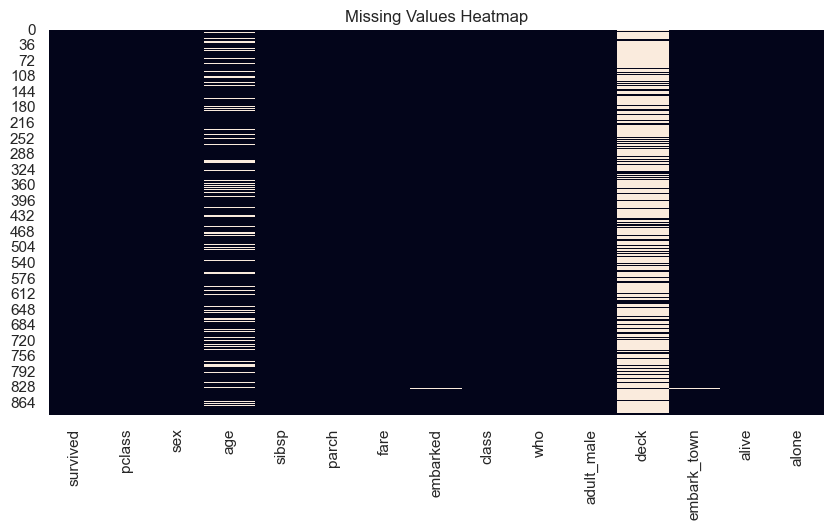

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

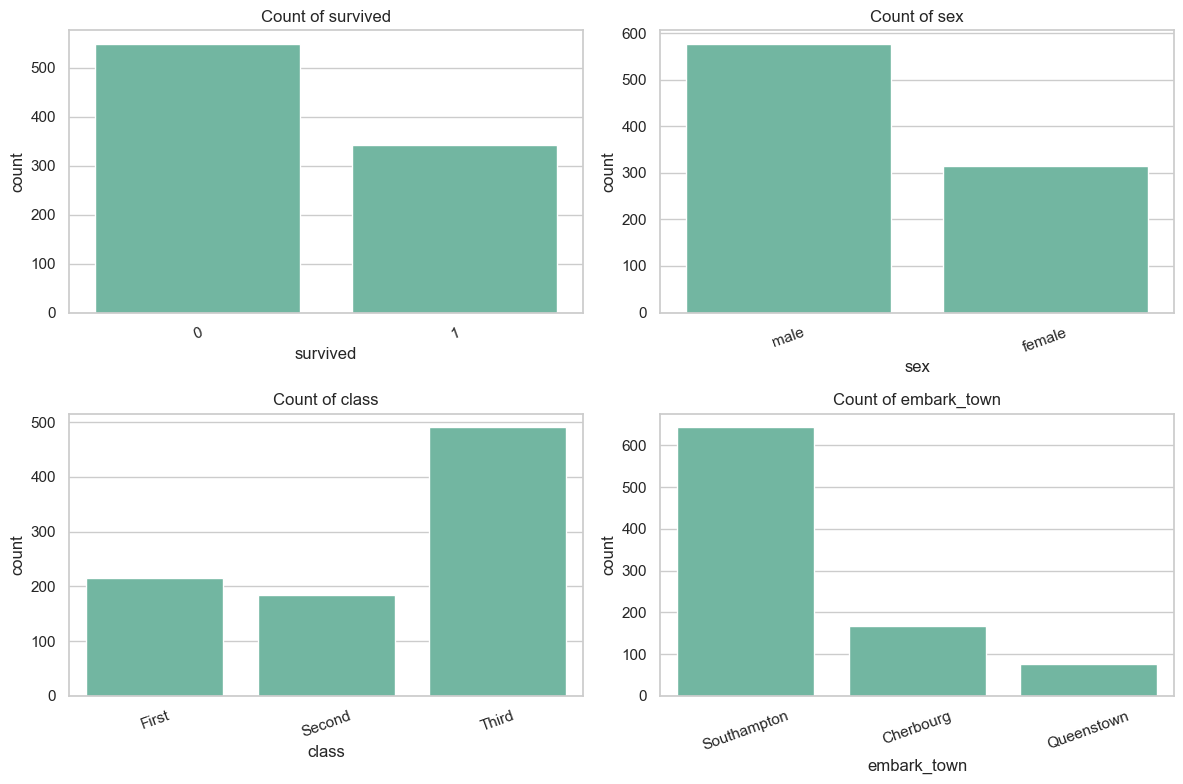

In [24]:
cat_cols = ["survived", "sex", "class", "embark_town"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=titanic, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

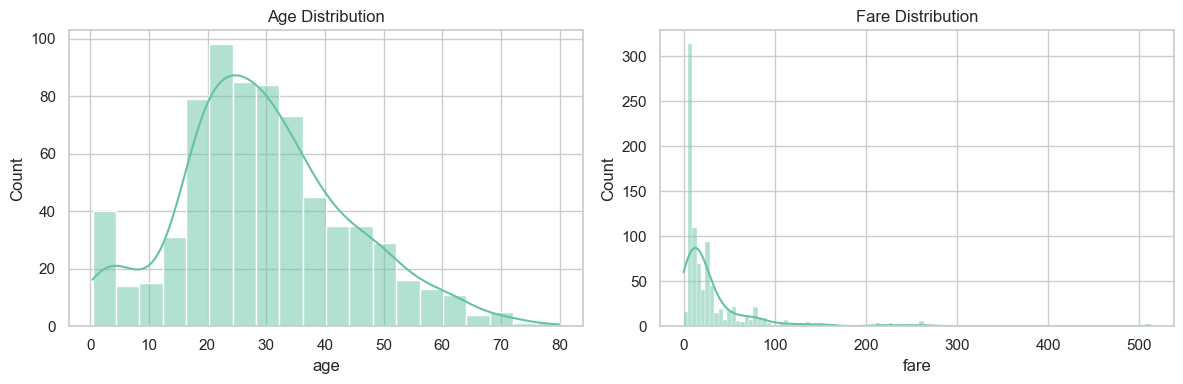

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(titanic["age"].dropna(), kde=True, ax=ax[0])
ax[0].set_title("Age Distribution")

sns.histplot(titanic["fare"], kde=True, ax=ax[1])
ax[1].set_title("Fare Distribution")

plt.tight_layout()
plt.show()

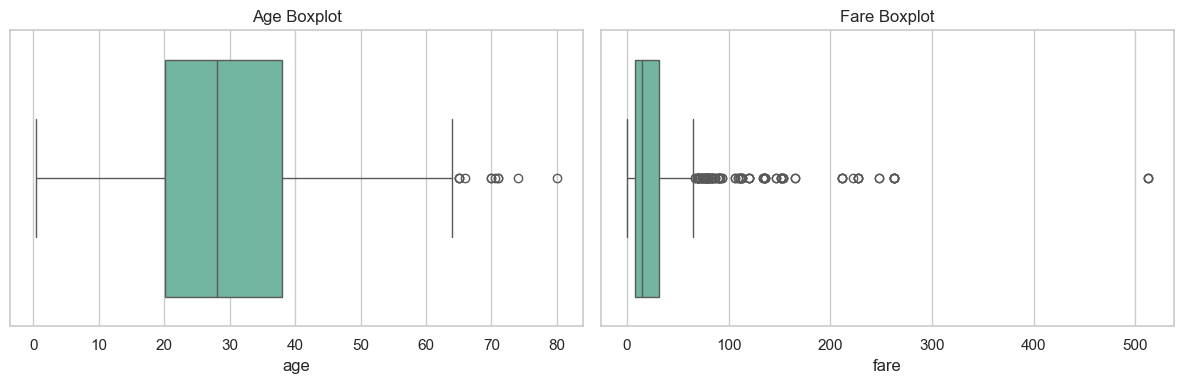

In [28]:
# Boxplots for outliers
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x=titanic["age"], ax=ax[0])
ax[0].set_title("Age Boxplot")
sns.boxplot(x=titanic["fare"], ax=ax[1])
ax[1].set_title("Fare Boxplot")
plt.tight_layout()
plt.show()


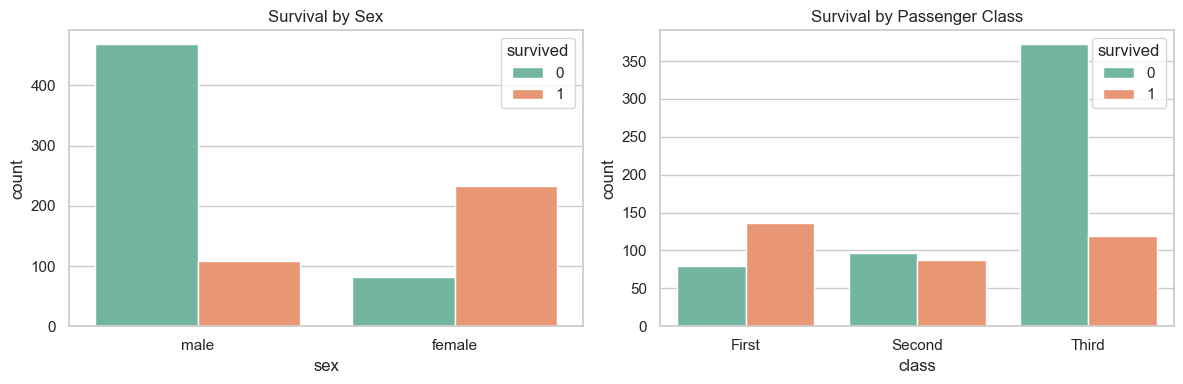

In [30]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data=titanic, x="sex", hue="survived")
plt.title("Survival by Sex")

plt.subplot(1,2,2)
sns.countplot(data=titanic, x="class", hue="survived")
plt.title("Survival by Passenger Class")

plt.tight_layout()
plt.show()


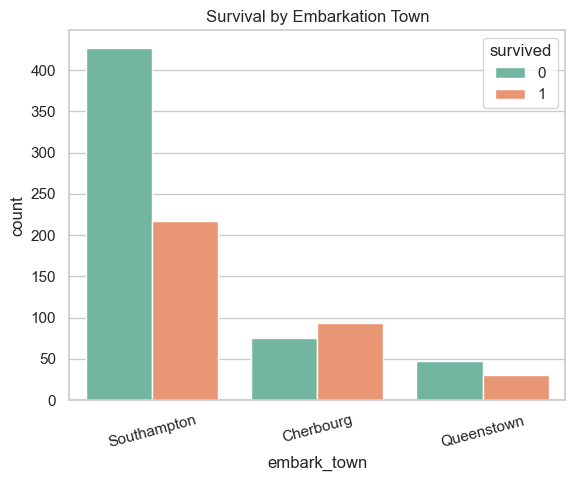

In [32]:
sns.countplot(data=titanic, x="embark_town", hue="survived")
plt.title("Survival by Embarkation Town")
plt.xticks(rotation=15)
plt.show()

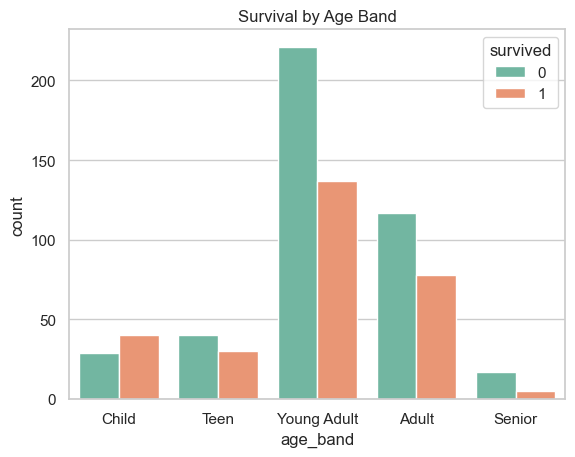

In [34]:
titanic["age_band"] = pd.cut(titanic["age"], bins=[0,12,18,35,60,80],
                             labels=["Child","Teen","Young Adult","Adult","Senior"])

sns.countplot(data=titanic, x="age_band", hue="survived")
plt.title("Survival by Age Band")
plt.show()


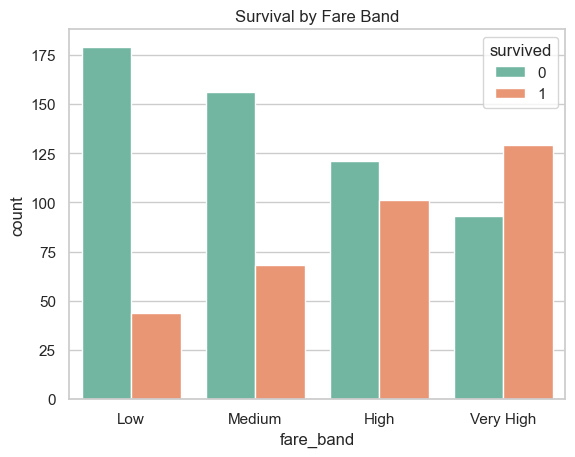

In [36]:
titanic["fare_band"] = pd.qcut(titanic["fare"], 4, labels=["Low","Medium","High","Very High"])

sns.countplot(data=titanic, x="fare_band", hue="survived")
plt.title("Survival by Fare Band")
plt.show()


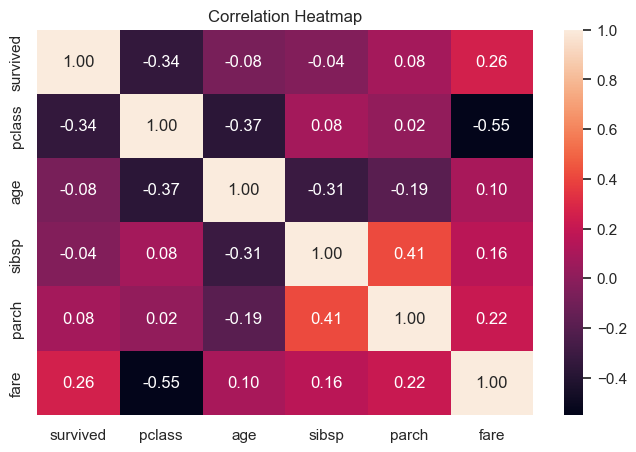

In [38]:
# Encode survived, pclass numerically already; select numeric columns
num_cols = ["survived","pclass","age","sibsp","parch","fare"]

corr = titanic[num_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


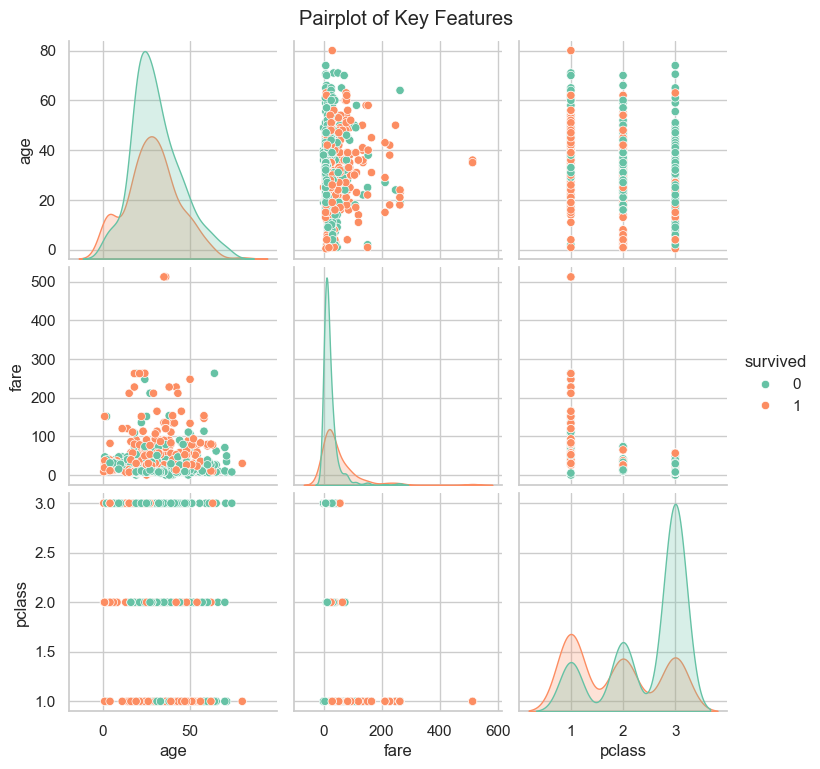

In [41]:
sns.pairplot(titanic[["survived","age","fare","pclass"]].dropna(),
             hue="survived")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
